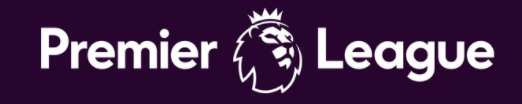

# English Premier League 18/19시즌 데이터에 대한 시각화 및 분석



## 1) 프로젝트 목표 및 내용

이 프로젝트의 궁극적 목표는 "EPL 데이터 분석"이다. EPL 데이터를 우선 두가지 방면으로 시각화할 것이다. 득점 순위, 어시스트 순위 등 일반적으로 많이 만들어지는 시각화와 그렇지 않은 독특한 시각화가 그것이다. 그리고 리그 상위권들의 데이터를 분석하여 어떤 요인들이 승리에 크게 기여하였는지를 알아보는 것이 목표이다. 

## 2) 주제 선정 이유

  나는 평소에 축구에 관심이 많다. 그래서 해외 축구, 그 중에서도 특히 영국 축구리그인 EPL을 많이 보는 편이다. 그러다가 소융개론 Project 2를 위한 조사를 하던 중 AI로 축구 유망주를 분석하는 한국의 스타트업 "Bepro11"에 관심을 가지게 되었다. "Bepro11"에서 영감을 받아서, 나 또한 축구 데이터를 분석해보고 싶다는 생각이 들었다. EPL 최근 시즌 중에서는 2018/2019 시즌이 강팀 맨시티와 리버풀의 2파전으로 흥미로웠기 때문에 이 시즌을 선택했고, 해당 시즌을 분석해보기 위해 이 주제를 선정하였다. 

## 3) 데이터 획득

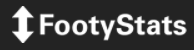

분석에 가장 적합한 데이터를 찾아본 결과, 최종적으로 FootyStats(https://footystats.org/)의 데이터를 사용하기로 했다. 데이터가 CSV 파일 형태인 대신 유료였지만, EPL 18/19 시즌 데이터는 무료였기 때문에 이 데이터를 선택하였다. 데이터의 원본이 있는 페이지는 https://footystats.org/download-stats-csv# 이다.

해당 데이터는 크게 4가지로 나눌 수 있었다.

1) League CSV: 

리그 자체에 대한 여러가지 데이터가 나와있다. 총 경기수, 평균 골 수 등이 있다.

2) Matches CSV: 

리그의 모든 경기 각각에 대한 데이터가 나와있다. 홈팀/원정팀, 심판, 각팀 골 수 등이 있다.

3) Teams CSV: 

리그의 각 팀에 대한 데이터가 나와있다. 각 팀의 승점, 순위, 경기수 등이 있다.

4) Players CSV: 

리그의 각 선수들에 대한 데이터가 나와있다. 득점수, 어시스트수, 받은 카드수 등이 있다.

리그의 각 요소에 대한 방대한 데이터가 잘 정리되어있었기 때문에 분석에 용이할 것이라고 생각했다.

## 4) 구현 내용

# [1. 일반적으로 이루어지는 데이터 시각화 재현]

EPL 공식 사이트 (https://www.premierleague.com/) 를 보면, 아래 사진과 같이 득점/어시스트/태클/클린시트 등 대부분의 데이터를 <순위> - <선수 이름> - <소속 클럽> - <국적> - <해당 데이터값>의 형태로 보여준다는 것을 알 수 있었다. 때문에 4개의 파일 중 "Players CSV" 파일에서 해당 요소들을 뽑아서 이 데이터 시각화를 동일하게 해보기로 하였다. 

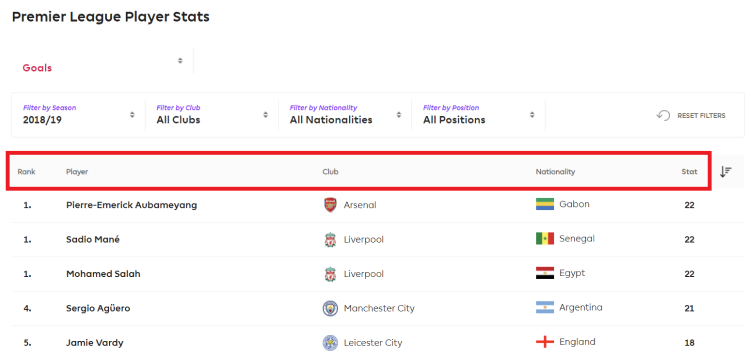

### 1 - 계획

1) 

pandas를 이용하여 "Players CSV"를 열고, 데이터들 중 순위, 선수 이름, 소속 클럽, 국적, 분석할 데이터값을 따로 추출하여 새로운 파일을 만든다.

2) 

해당 데이터에 대한 선수들의 순위를 정렬하여 나타내는 함수 organize_data()를 구현한다. 이 함수에는 각 데이터를 값이 높은 순으로 정렬하는 기능, 그리고 순위를 표시하는 기능이 필요할 것이다. 위의 사진에도 나와있는 것처럼 데이터값이 동일한 경우에는 순위가 1위 - 2위 - 3위가 아닌 1위 - 1위 - 1위로 표시되야하기 때문에 이 기능도 필요할 것이다.

3) 

organize_data()를 이용하여 사용자가 원하는 여러 데이터에 접근할 수 있게 만들어주는 함수 menu()를 구현한다. 이 함수에는 사용자가 보고 싶어하는 데이터의 종류를 묻는 부분이 필요할 것이고, 선택한 데이터를  organize_data() 함수에 보내는 기능도 필요할 것이다. 

4) 

최종 완성된 시각화 자료를 기존 데이터와 비교하여 얼마나 유사한지, 부족한 점은 없는지 등을 찾아본다.

### 1 - 코드

### pandas, matplotlib, numpy import 하기

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

### 한국어 그래프 생성용

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.TTF"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

### 선수 파일열기/ 개요 확인

In [3]:
Player_Data = pd.read_csv('epl_players_18_19.csv')

Player_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   full_name                       572 non-null    object 
 1   age                             572 non-null    int64  
 2   birthday                        572 non-null    int64  
 3   league                          572 non-null    object 
 4   season                          572 non-null    object 
 5   position                        572 non-null    object 
 6   Current Club                    572 non-null    object 
 7   minutes_played_overall          572 non-null    int64  
 8   minutes_played_home             572 non-null    int64  
 9   minutes_played_away             572 non-null    int64  
 10  nationality                     572 non-null    object 
 11  appearances_overall             572 non-null    int64  
 12  appearances_home                572 

### 데이터 순위 찾는 함수 organize_data()

In [4]:
def organize_data(a):
    
    # A. 데이터 중 득점 관련 데이터 추출, 득점 많은 순으로 정렬
    goals = Player_Data[['full_name', 'Current Club', 'nationality', a]]
    goals_Chart = goals.sort_values( by = a, ascending = False)
    
    # B. 표 합치기 용 인덱스 지정
    rank_list = []
    num_players = 572

    index = []
    for i in range(1, num_players+1):
        index.append(i-1)
        i+=1

    goals_Chart.index = index

    # C. 순위 표시하는 리스트 만들기
    count = 0
    
    rank_list.append(1)
    for i in range(0, num_players-1):
        if(int(goals_Chart.iloc[i, 3]) != int(goals_Chart.iloc[i+1, 3])):
            count = i + 1
        rank_list.append(count+1)
        i+=1
        
    # 순위 리스트와 기존 표 합치기, 출력    
    Player_Data['순위']= rank_list

    fin_goals = pd.concat([Player_Data['순위'], goals_Chart], axis = 1)

    display(fin_goals.head(10))
    
    fin_goals.index = fin_goals['full_name']
    x = fin_goals[a].head(10).sort_values().plot(kind = 'barh', grid = True, figsize = (10, 5))
    plt.show()

### 실행해보기

,순위,full_name,Current Club,nationality,goals_overall
0,1,Sadio Mané,Liverpool,Senegal,22
1,1,Mohamed Salah,Liverpool,Egypt,22
2,1,Pierre-Emerick Aubameyang,Arsenal,Gabon,22
3,4,Sergio Aguero,Manchester City,Argentina,21
4,5,Jamie Vardy,Leicester City,England,18
5,6,Raheem Sterling,Manchester City,England,17
6,6,Harry Kane,Tottenham Hotspur,England,17
7,8,Eden Hazard,Chelsea,Belgium,16
8,9,Callum Wilson,AFC Bournemouth,England,14
9,10,Gylfi Sigurdsson,Everton,Iceland,13


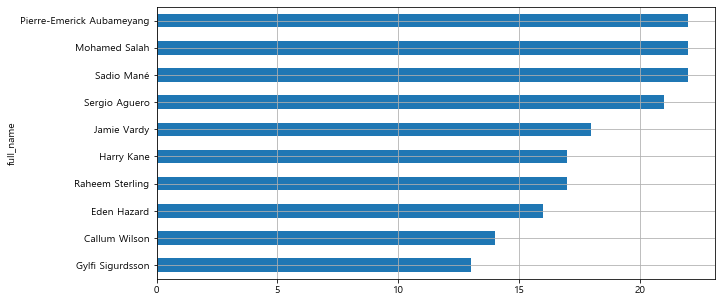

In [5]:
organize_data('goals_overall')

### organize_data() 함수를 이용하여 각종 데이터에 접근하게 해주는 함수 menu1()

In [6]:
def menu_1():
    
    
    while(1): 
        print("보고 싶은 정보의 번호를 입력해주세요")
        print("1 : 나이")
        print("2 : 뛴 경기 시간")
        print("3 : 뛴 경기수")
        print("4 : 골 수")
        print("5 : 어시스트 수")
        print("6 : 페널티골 수")
        print("7 : 클린시트 수")
        print("8 : 옐로우카드 수")
        print("9 : 레드카드 수")
        print("0 : 종료")
        
        data_type = input("보고 싶은 정보를 입력해주세요: ")
        
        if(data_type == '1'):
            data = "age"
        elif(data_type == '2'):
            data = "minutes_played_overall"
        elif(data_type == '3'):
            data = "appearances_overall"
        elif(data_type == '4'):
            data = "goals_overall"
        elif(data_type == '5'):
            data = "assists_overall"
        elif(data_type == '6'):
            data = "penalty_goals"
        elif(data_type == '7'):
            data = "clean_sheets_overall"
        elif(data_type == '8'):
            data = "yellow_cards_overall"
        elif(data_type == '9'):
            data = "red_cards_overall"
        elif(data_type == '0'):
            print("감사합니다")
            break
        else:
            print("잘못된 입력입니다")
            print("")
            continue
            
            
        organize_data(data)

### 실행해보기

보고 싶은 정보의 번호를 입력해주세요
1 : 나이
2 : 뛴 경기 시간
3 : 뛴 경기수
4 : 골 수
5 : 어시스트 수
6 : 페널티골 수
7 : 클린시트 수
8 : 옐로우카드 수
9 : 레드카드 수
0 : 종료
보고 싶은 정보를 입력해주세요: 4


,순위,full_name,Current Club,nationality,goals_overall
0,1,Sadio Mané,Liverpool,Senegal,22
1,1,Mohamed Salah,Liverpool,Egypt,22
2,1,Pierre-Emerick Aubameyang,Arsenal,Gabon,22
3,4,Sergio Aguero,Manchester City,Argentina,21
4,5,Jamie Vardy,Leicester City,England,18
5,6,Raheem Sterling,Manchester City,England,17
6,6,Harry Kane,Tottenham Hotspur,England,17
7,8,Eden Hazard,Chelsea,Belgium,16
8,9,Callum Wilson,AFC Bournemouth,England,14
9,10,Gylfi Sigurdsson,Everton,Iceland,13


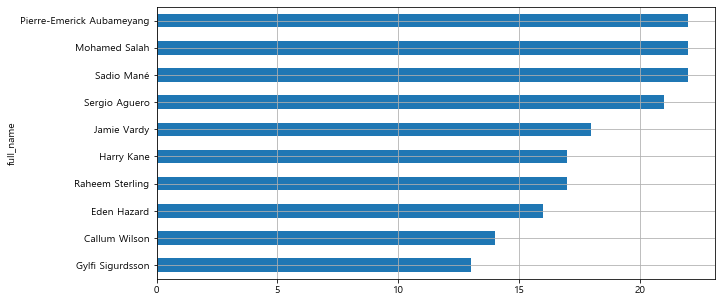

보고 싶은 정보의 번호를 입력해주세요
1 : 나이
2 : 뛴 경기 시간
3 : 뛴 경기수
4 : 골 수
5 : 어시스트 수
6 : 페널티골 수
7 : 클린시트 수
8 : 옐로우카드 수
9 : 레드카드 수
0 : 종료
보고 싶은 정보를 입력해주세요: 0
감사합니다


In [7]:
menu_1()

# [2. 잘 이루어지지 않는 데이터 분석]

일반적으로 잘 이루어지지 않는 데이터 분석에는 무엇이 있을지에 대해 고민해보고, 모듈을 이용해서 직접 분석하여 시각화하는 것이 목표이다. 생각해본 것 중 한가지는 "심판 이름", "경기당 옐로우카드/레드카드 수", "각 심판 출전 경기수" 데이터를 이용한 것이다. 각 심판이 평균적으로 한 경기에 몇개의 경고를 주었는지에 따라 해당 심판이 얼마나 엄격한 성향의 심판인지 분석해보는 것이 흥미로울 것 같다고 생각했다. 이 외에도 데이터들 사이의 연관관계를 생각하여 분석할 예정이다.

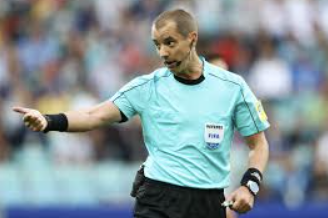

### 2 - 계획

1) 

"Matches CSV"를 열고, 데이터들 중 심판 이름, 경기수, 옐로우카드 수, 레드카드수 등의 데이터값을 따로 추출하여 새로운 파일을 만든다.

2) 

레드카드는 옐로우카드에 비해 더욱 엄격한 판정이므로 두 카드에 가중치를 다르게 두어야겠다고 생각했다. 그러나 정확히 어느 정도로 가중치를 다르게 두어야 할 것인지에 대한 기준이 불분명하고, 데이터값에 "경기당 카드수"라는 직관적인 이름을 주지 못하기 때문에 카드의 수에 따라서만 계산하기로 하였다.

3)

각 심판에 대하여 식
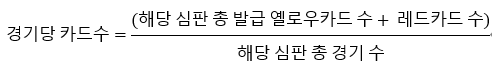
을 통하여 심판별로 경기당 카드수를 계산하고, 심판 이름과 그 값을 연결시킨다.

4)

최종 데이터 결과를 분석하고, 심판들에 대한 실제 기사 등을 사용하여 심판의 실제 성향과 비교해본다.

### 2 - 코드

### 심판의 성향 분석해보기(사용 카드 수에 따라)

,심판,경기당 카드수
1,Mike Dean,4.966
2,Roger East,4.400
3,Craig Pawson,3.808
4,Jonathan Moss,3.778
5,Kevin Friend,3.519
6,Paul Tierney,3.458
7,Lee Mason,3.368
8,Anthony Taylor,3.219
9,Chris Kavanagh,3.208
10,Stuart Attwell,3.200


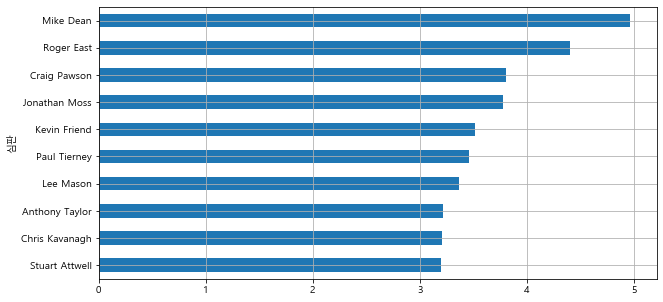

In [8]:
# 경기 데이터 불러오기
Matches_Data = pd.read_csv('epl_matches_18_19.csv')

# 심판, 카드 데이터만 따로 추출하기
referee = Matches_Data[['referee', 'home_team_yellow_cards', 'home_team_red_cards', 'away_team_yellow_cards', 'away_team_red_cards']]

# 심판별로 총 카드수(홈경기 엘로우카드 + 홈경기 레드카드 + 원정경기 옐로우카드 + 원정경기 레드카드) 계산하고, 그 값을 심판이 뛴 경기수로
# 나눠서(총 카드수/경기수) 각 심판이 경기당 준 카드의 수를 계산한다.
ref_list = []
cards_list = []
match_number = []


for i in range(0, 380):
    total = referee.iloc[i , 1] + referee.iloc[i , 2] + referee.iloc[i , 3] + referee.iloc[i , 4]
    if(referee.iloc[i , 0] not in ref_list):
        ref_list.append(referee.iloc[i , 0])
        cards_list.append(total)
        match_number.append(1)
    else:
        for j in range(0, len(ref_list)):
            if(referee.iloc[i , 0] == ref_list[j]):
                cards_list[j] += total
                match_number[j] += 1
    
cards_per_match = [0]*len(ref_list)

for i in range(0, len(ref_list)):
    cards_per_match[i] = round(cards_list[i]/match_number[i], 3)
    #print(ref_list[i])
    #print(cards_per_match[i])
    
# 경기당 카드수 많은 순서로 심판들 정렬하기
rank = []
for i in range(1, 19):
    rank.append(i)
    
referee_trait = pd.DataFrame({'심판': ref_list, '경기당 카드수': cards_per_match})
x = referee_trait.sort_values(by = '경기당 카드수', ascending = False)
x.index = rank

display(x.head(10))

x.index = x['심판']
x.head(10)['경기당 카드수'].sort_values().plot(kind = 'barh', grid = True, figsize = (10, 5))
plt.show()

# [3. 각 팀의 리그 성과 한눈에 보기]

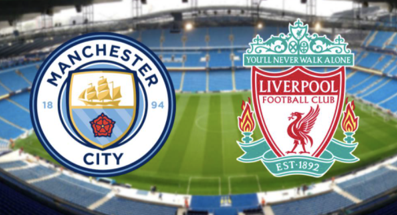

위에서 언급한 것처럼, 이 시즌은 맨시티와 리버풀 두팀이 다른 팀들에 비해 월등한 퍼포먼스를 보여준 시즌으로 유명하다. 따라서 어떤 데이터 항목들이 승리에 가장 큰 영향을 미쳤는지, 즉 승패와 연관도가 높은 데이터들을 찾아보기로 했다. 연관도를 찾아보는 데에는 히트맵 등을 활용할 계획이다.

### 3 - 계획

1) 

"Teams CSV"를 열고, 데이터들 중 골 수, 클린시트 등 리그 최종 순위와 직관적으로 관련있을 것 같은 데이터 등의 데이터값 9개를 따로 추출하여 새로운 파일을 만든다.

2)

그 데이터 9개로 3X3 히트맵을 만들어서, 각 데이터값들 중 리그 최종 순위와 가장 관련이 깊은 데이터 2개를 선택한다.

3)

데이터 2개를 그래프의 x축, y축으로 놓고 그래프상에 각 팀의 위치를 표시한다.

4)

최종 그래프를 분석하고, 알 수 있는 정보들에 대해서 알아본다.

### 3 - 코드

### 직관적으로 순위와 관련 높은 데이터 분류

In [9]:
# 히트맵 사용하기 위해
import seaborn as sns 

#팀 데이터 불러오기
Teams_Data = pd.read_csv('epl_teams_18_19.csv')

Teams_Data.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 280 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   team_name                                object 
 1   common_name                              object 
 2   season                                   object 
 3   country                                  object 
 4   matches_played                           int64  
 5   matches_played_home                      int64  
 6   matches_played_away                      int64  
 7   suspended_matches                        int64  
 8   wins                                     int64  
 9   wins_home                                int64  
 10  wins_away                                int64  
 11  draws                                    int64  
 12  draws_home                               int64  
 13  draws_away                               int64  
 14  losses                     

In [10]:
# 직관적으로 승리와 관련 있을 것 같은 요소들만 따로 분류하기
relatives = Teams_Data[['league_position', 'points_per_game', 'goals_scored', 'goals_conceded', 'goal_difference', 
                        'clean_sheets', 'average_possession', 'shots', 'shots_on_target']]

                    league_position  points_per_game  goals_scored  \
league_position            1.000000        -0.954118     -0.900407   
points_per_game           -0.954118         1.000000      0.971124   
goals_scored              -0.900407         0.971124      1.000000   
goals_conceded             0.906426        -0.922231     -0.831100   
goal_difference           -0.943743         0.990912      0.962685   
clean_sheets              -0.717073         0.807763      0.761770   
average_possession        -0.846605         0.853584      0.864491   
shots                     -0.799502         0.813270      0.783372   
shots_on_target           -0.879264         0.905648      0.910735   

                    goals_conceded  goal_difference  clean_sheets  \
league_position           0.906426        -0.943743     -0.717073   
points_per_game          -0.922231         0.990912      0.807763   
goals_scored             -0.831100         0.962685      0.761770   
goals_conceded         

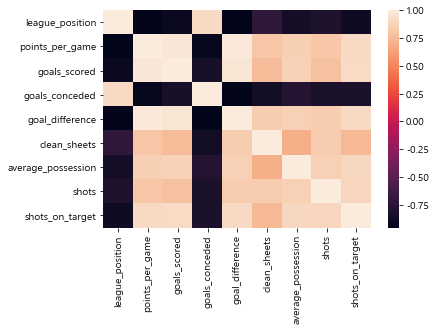

In [11]:
print(relatives.corr())
sns.heatmap(relatives.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   new_league_position  20 non-null     int64  
 1   points_per_game      20 non-null     float64
 2   goals_scored         20 non-null     int64  
 3   new_goals_conceded   20 non-null     int64  
 4   goal_difference      20 non-null     int64  
 5   clean_sheets         20 non-null     int64  
 6   average_possession   20 non-null     int64  
 7   shots                20 non-null     int64  
 8   shots_on_target      20 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 1.5 KB
                     new_league_position  points_per_game  goals_scored  \
new_league_position             1.000000         0.954118      0.900407   
points_per_game                 0.954118         1.000000      0.971124   
goals_scored                    0.900407         0.971124      1.000000  

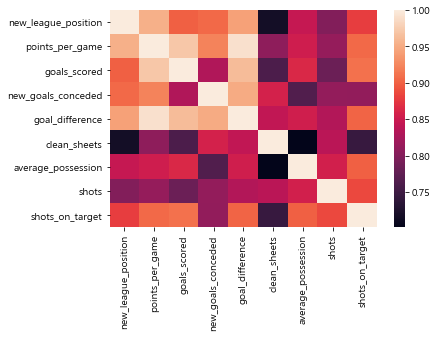

In [12]:
# 위 히트맵이 이상한 이유: 팀 순위, 실점은 적을수록 좋기 떄문에 높을수록 좋은 다른 데이터와 연관이 있을 수 없음
# > 팀 순위, 실점을 각각 (20- 팀순위), -(실점) 으로 바꿔서 높을수록 좋은 데이터로 바꿨음.
# > 결과: 아래에 정상적인 히트맵이 출력되었음

Teams_Data['new_league_position'] = 20 - Teams_Data['league_position']
Teams_Data['new_goals_conceded'] =  -Teams_Data['goals_conceded']

new_relatives = Teams_Data[['new_league_position', 'points_per_game', 'goals_scored', 'new_goals_conceded', 'goal_difference', 'clean_sheets', 'average_possession', 'shots', 'shots_on_target']]
                                        
new_relatives.info()

print(new_relatives.corr())
sns.heatmap(new_relatives.corr())              

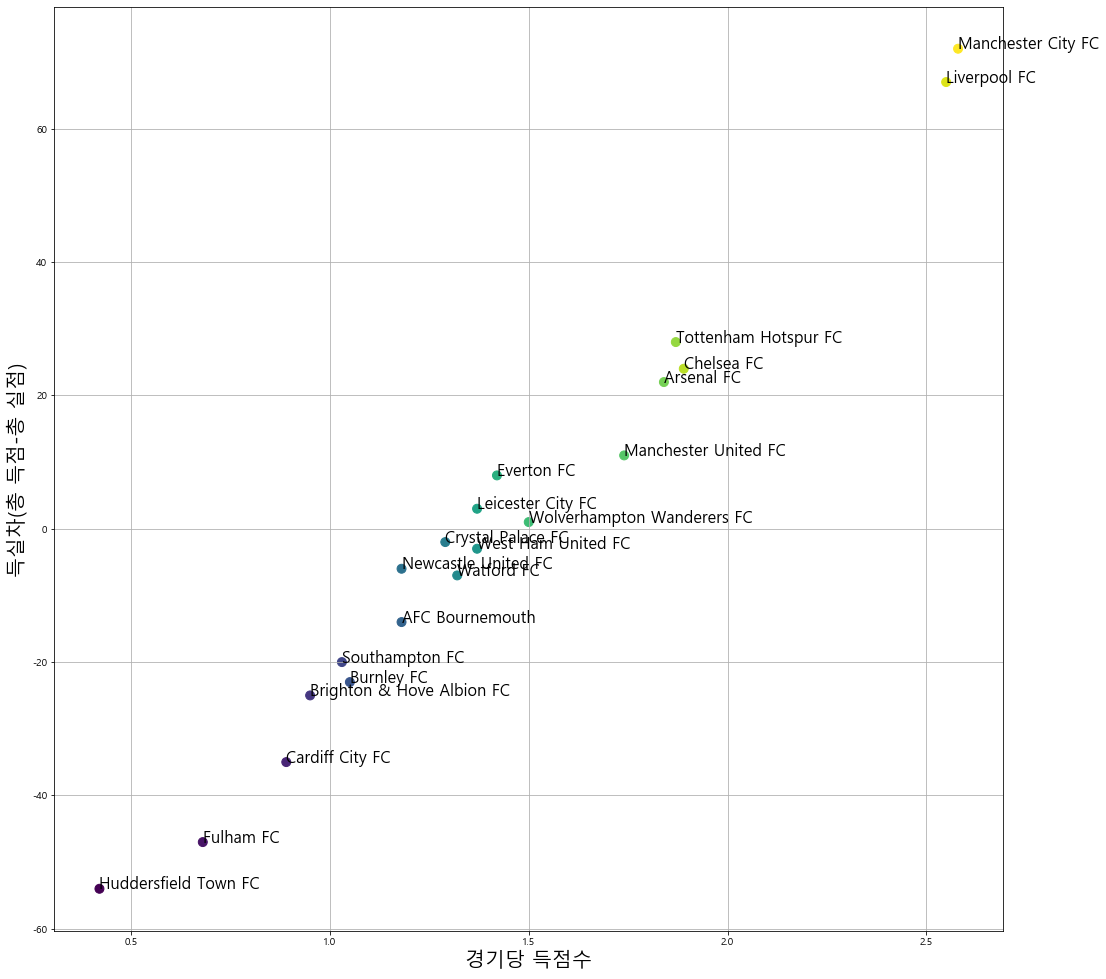

In [13]:
# 히트맵을 분석한 결과, 리그 순위 항목('new_league_position')과 가장 연관성이 높았던 데이터는 points_per_game(경기당 득점, 0.954118), 
# goal_difference(득실 차, 0.943743) 이었다. 이 두 데이터를 이용하여 리그의 팀 20개를 그래프 상에 배치하여 각 팀의 경기력을 보기 쉽게
# 시각화해보기로 하였다.

plt.figure(figsize=(17,17))
plt.scatter(Teams_Data['points_per_game'], Teams_Data['goal_difference'],c = new_relatives['new_league_position'], s = 80)

for i in range(20):
    plt.text(Teams_Data['points_per_game'][i], Teams_Data['goal_difference'][i], Teams_Data['team_name'][i], fontsize = 16)

plt.xlabel('경기당 득점수', fontsize = 20)
plt.ylabel('득실차(총 득점-총 실점)', fontsize = 20)

plt.grid()
plt.show()

그래프 생성 결과, 각 팀의 경기력을 한 눈에 보기 쉽게 되었다. 

특히 프로젝트 초반부에 언급했던 맨체스터 시티와 리버풀간의 2파전이라는 것도 잘 드러난다.

## 5) 분석 결과, 결론

같은 폴더의 PPT 파일에 프로젝트 요약, 분석 결과, 결론 부분을 정리해 놓았습니다.

## 6) 참고 문헌

1)  FootyStats(https://footystats.org/): 데이터 원본을 획득한 사이트

2) EPL 공식 사이트(https://www.premierleague.com/): 경기 데이터가 어떤 방식으로 정리되고 활용되는지 참고한 사이트

3) Kaggle(https://www.kaggle.com/): 데이터를 가공하는 여러가지 방법들을 배운 사이트